In [47]:
import numpy as np
import seaborn as sns
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [48]:
filenames = ['data/2017-05-22-measurements-phenotype_evaluation/single_objective/fitness/HvsL_single/bests.txt',
             'data/2017-05-22-measurements-phenotype_evaluation/single_objective/fitness/HvsR/HvsL.txt',
             'data/2017-05-22-measurements-phenotype_evaluation/single_objective/fitness/MvsL/MvsL.txt',
             'data/2017-05-22-measurements-phenotype_evaluation/single_objective/fitness/MvsR/MvsR_again.txt',
             'data/2017-06-09-measurements-low_level/LowVSLegacy/fitnesses.txt',
             'data/2017-06-09-measurements-low_level/LowVSRandom/fitnesses.txt'
            ]
names = ['High vs Legacy',
         'High vs Random',
         'Medium vs Legacy',
         'Medium vs Random',
         'Low vs Legacy',
         'Low vs Random'
        ]
scores = []

In [49]:
def parse(filename):
    with open(filename) as f:
        score = ast.literal_eval(f.readline())

    scores.append(score)

In [50]:
[parse(filename) for filename in filenames];

In [51]:
def clear_sco(sss):
    clear_scores = []
    for file in sss:
        kk = []
        for s in file:
            kk.append(s[0])
        clear_scores.append(kk)
        
    return clear_scores

In [52]:
final_scores = clear_sco(scores)

In [53]:
final_scores[2] = final_scores[2][:50]
final_scores[3] = final_scores[3][:50]
final_scores[4] = final_scores[4][:50]
final_scores[5] = final_scores[5][:50]

In [54]:
df = pd.DataFrame(final_scores, index=names, columns=list(range(len(final_scores[0]))))
df = df.transpose()

In [55]:
gs = gridspec.GridSpec(2, 1, height_ratios=[210, 101])
ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax.set_prop_cycle(plt.cycler('color', [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["denim blue"]]))
ax2.set_prop_cycle(plt.cycler('color', [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["denim blue"]]))

In [56]:
ax = df.plot(style=['-', '--', '-', '--', '-', '--'], ax=ax, lw=1.5)
ax2 = df.plot(style=['-', '--', '-', '--', '-', '--'], ax=ax2, lw=1.5)

In [57]:
ax.set_ylim(89900, 100000)  # most of the data
ax2.set_ylim(43000, 64000)  # outliers only

(43000, 64000)

In [58]:
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

In [59]:
# tiny slashes
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

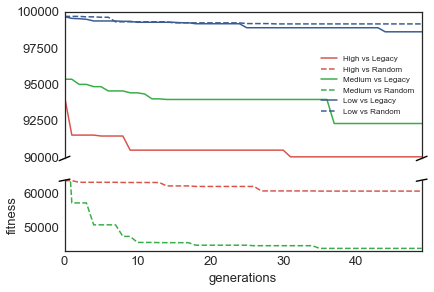

In [60]:
ax.set_xlim(0,49)
ax2.set_xlim(0,49)
plt.ylabel('fitness', fontsize=13)
plt.xlabel('generations', fontsize=13)
ax.tick_params(labelsize=13)
ax2.tick_params(labelsize=13)
plt.legend(names)
ax.legend(loc=5)
ax2.legend().set_visible(False)
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.show()

In [61]:
#plt.savefig('all_fitnesses.png', bbox_inches='tight', dpi=400)